# SUPPORT VECTOR MACHINE
## Exploring data
Data: Wine quality from Kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

I will design a model that will classify the quality of wine using SVM.

In [194]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

path = 'C:/Users/katia/Documents/Machine learning'
os.chdir(path)

In [195]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('winequality-red.csv')

In [196]:
# Check variables
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [197]:
# Check descriptive statistics of continuous variables
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [198]:
# Check if there are any missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [199]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

No missing values. There is no need to fill missing data with means or discard rows. Also, because all variables are floats or integers, no encoding is necessary.

### Explore continuous variables

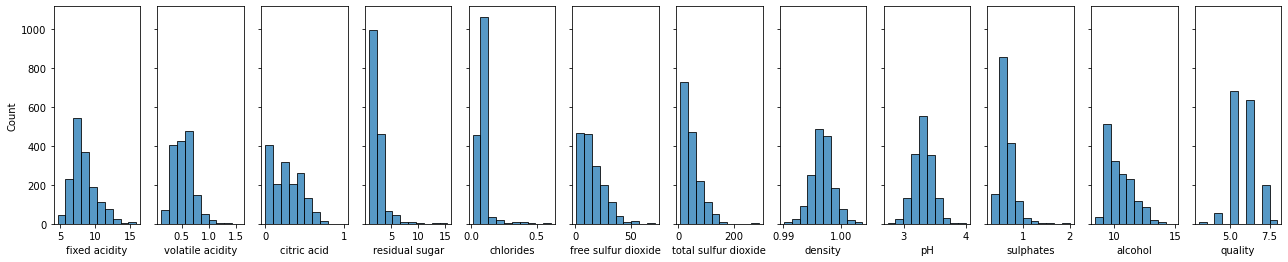

In [200]:
# Exploring distributions with histograms

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(1, 12, sharey=True, figsize = (22,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1


Let's explore the relationship with the dependent variable (i.e., wine quality) and continuous variables.

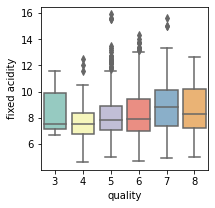

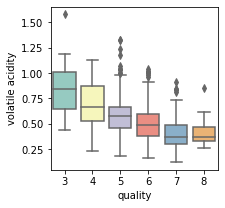

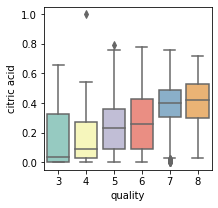

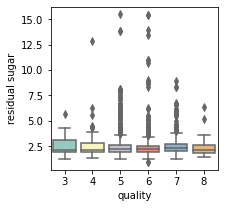

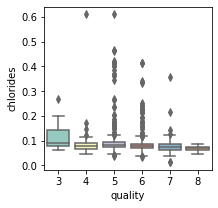

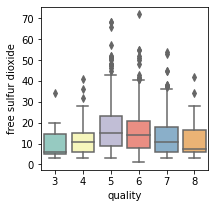

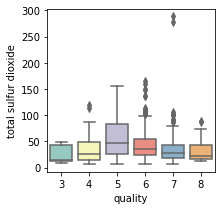

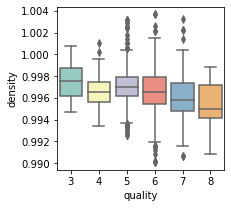

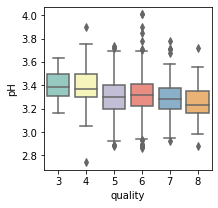

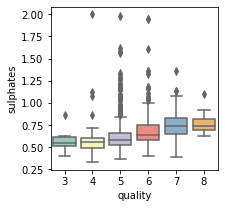

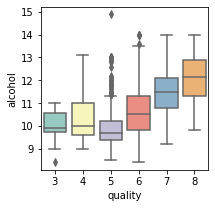

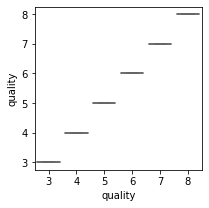

In [201]:
# Boxplots afford an exploration of how the data is distributed, the presence of outlier and differences across groups

# Boxplots
for column in df: 
    plt.figure(figsize=(3,3))
    sns.boxplot(df['quality'], df[column], palette="Set3")
    plt.show()

The variables 'volatile acidity', 'citric acid', 'sulphates', and 'alcohol' seem to be differentiating the quality of some wines. It may be worth testing a model with only these variables.

### Check for multicollinearity

Let's check for multicollinearity and remove highly correlated variables.

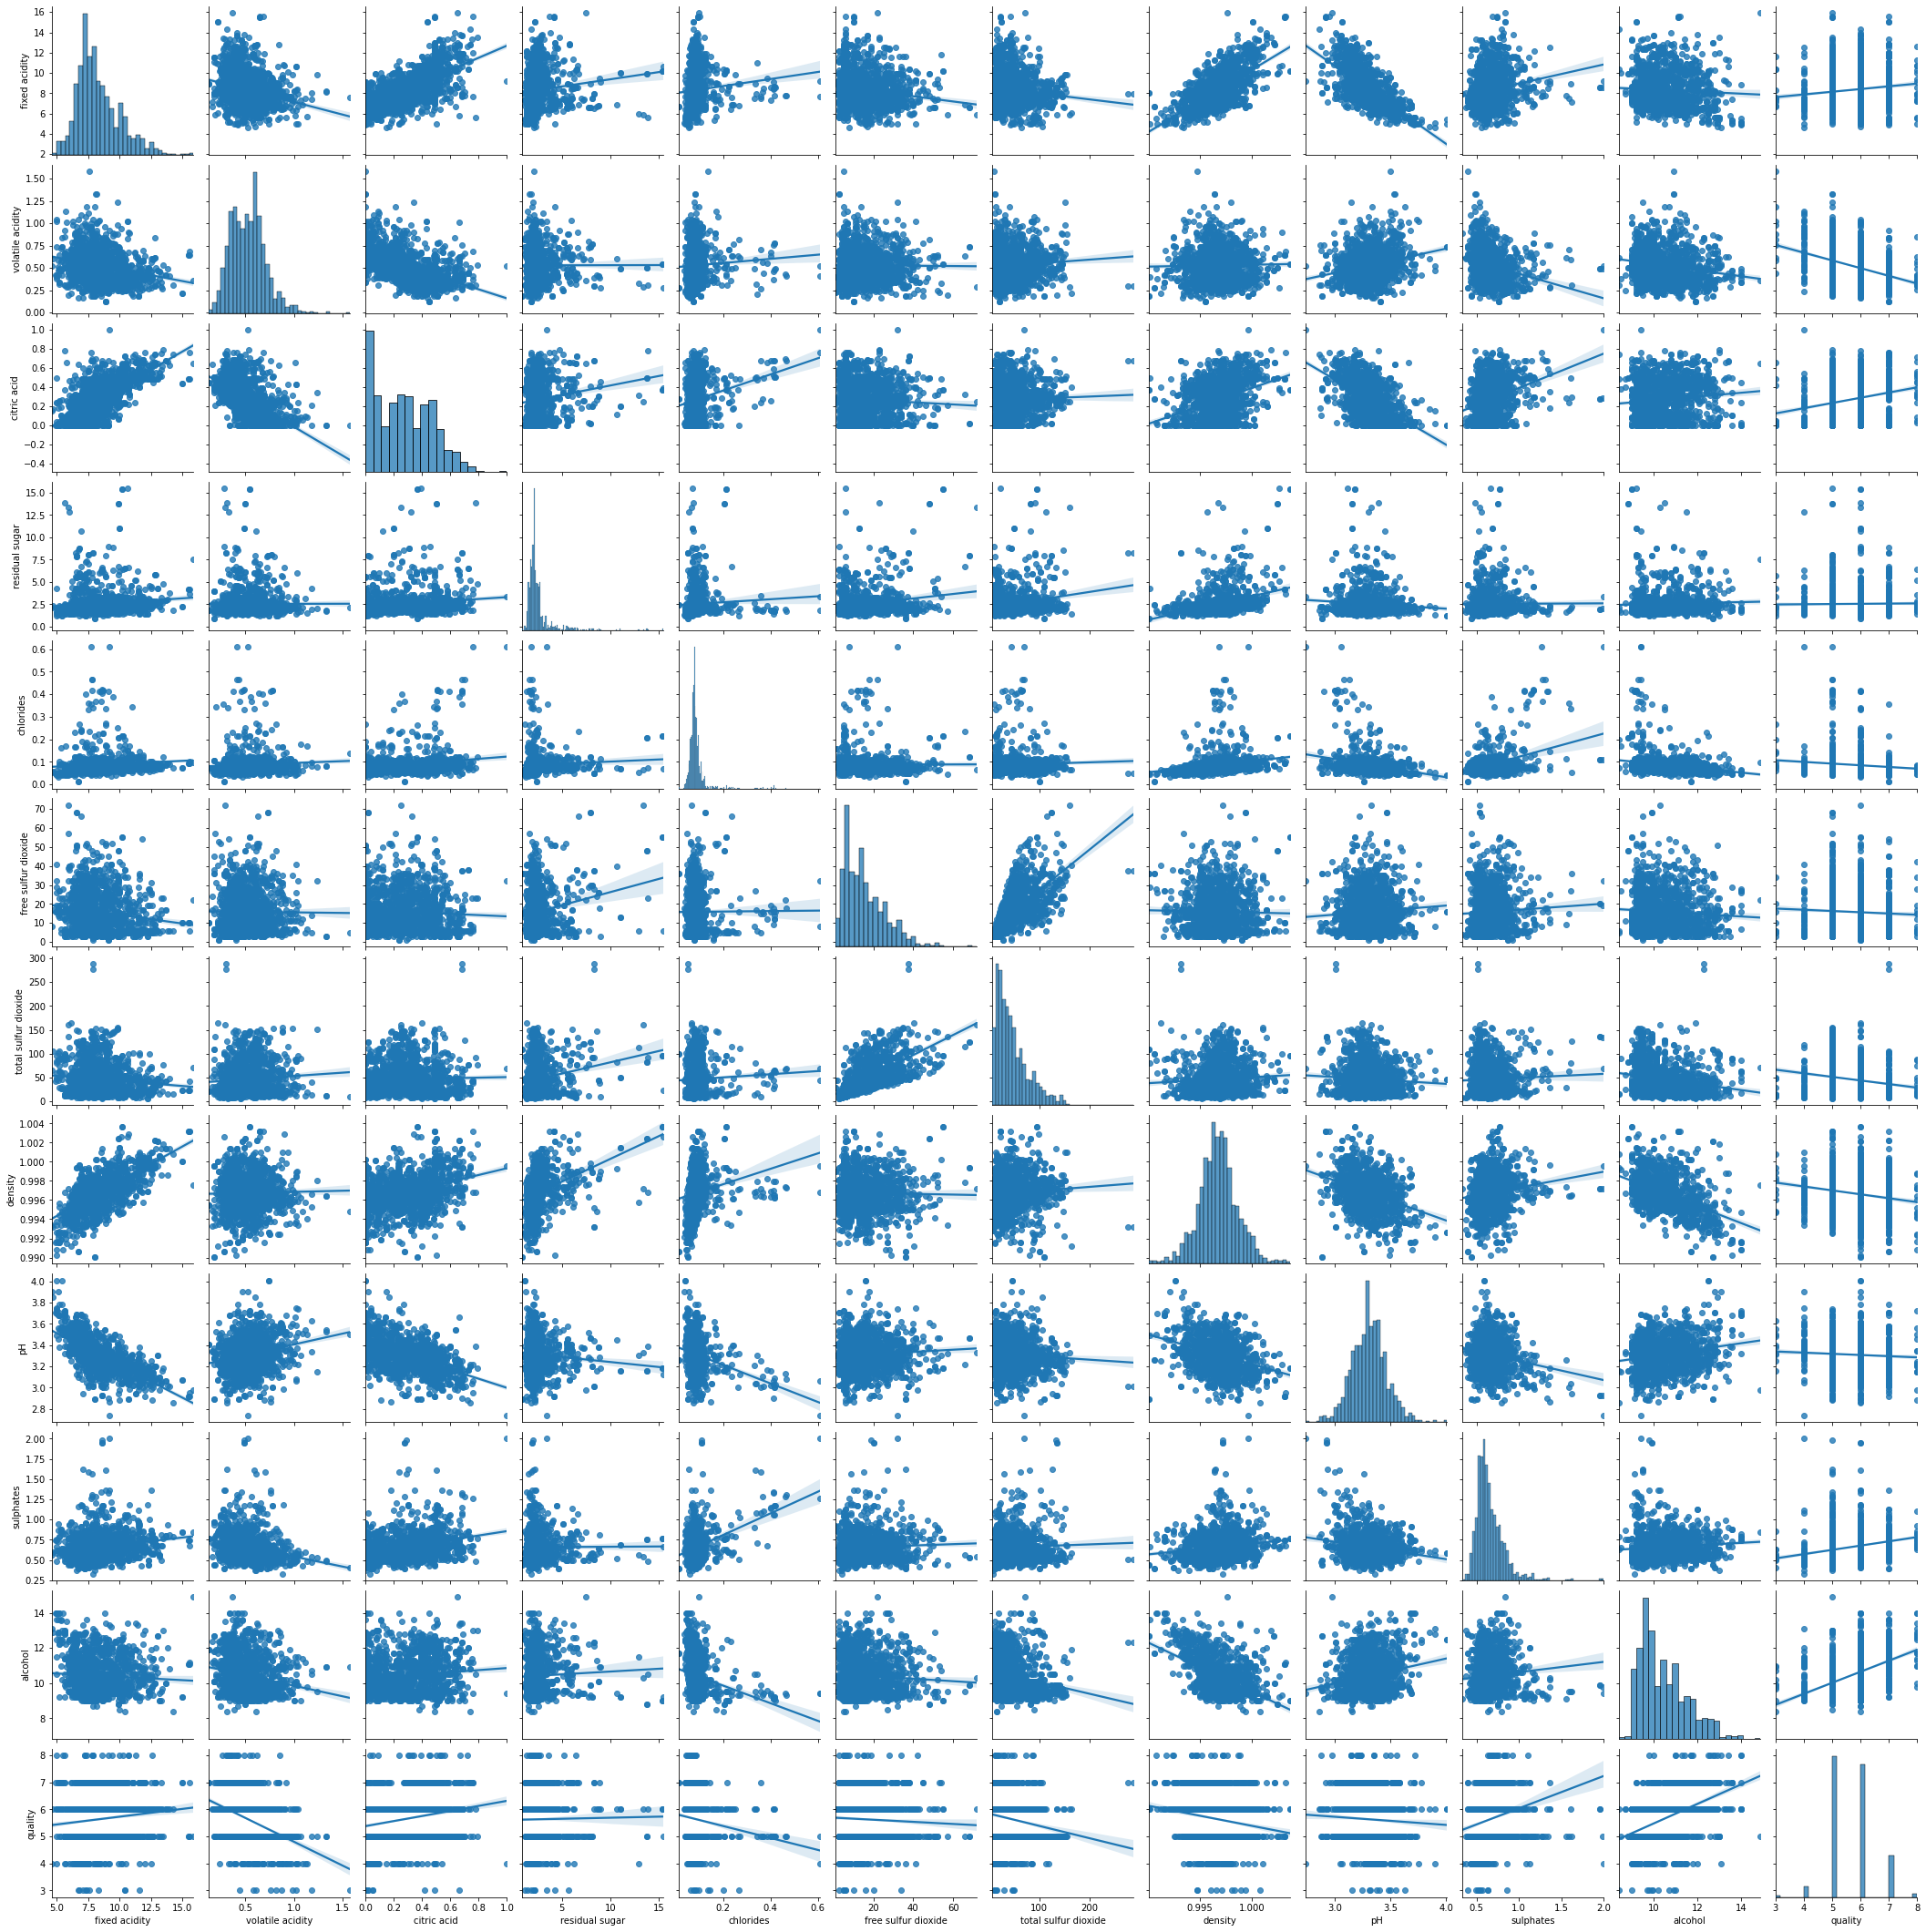

In [124]:
# Pairplot

sns.pairplot(df, kind="reg")

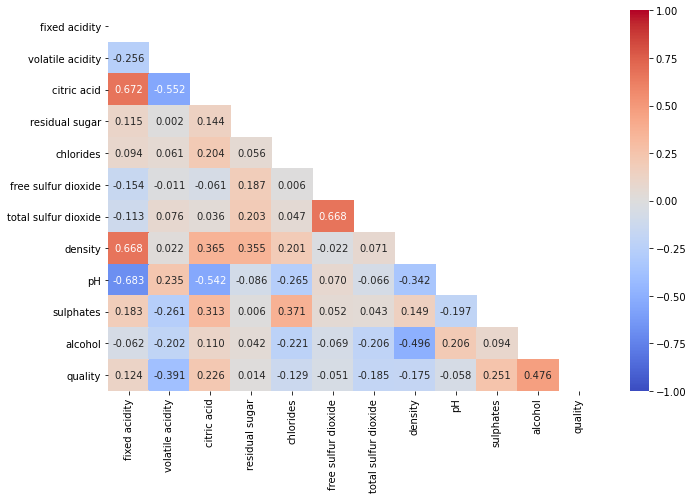

In [202]:
# Generate correlation matrix heat map
plt.figure(figsize = (11, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

We should eliminate the multicollinear variables.

In [203]:
df.drop(['fixed acidity', 'free sulfur dioxide'], axis=1, inplace = True)

## Removing outliers

In [138]:
# Define function to remove outliers

def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [139]:
# check outliers

for variable in df:
    outlier(variable)



Outlier caps for volatile acidity:
  --95p: 0.8 / 76 values exceed that
  --3sd: 1.1 / 10 values exceed that
  --99p: 1.0 / 15 values exceed that

Outlier caps for citric acid:
  --95p: 0.6 / 78 values exceed that
  --3sd: 0.9 / 1 values exceed that
  --99p: 0.7 / 16 values exceed that

Outlier caps for residual sugar:
  --95p: 5.1 / 79 values exceed that
  --3sd: 6.8 / 30 values exceed that
  --99p: 8.3 / 16 values exceed that

Outlier caps for chlorides:
  --95p: 0.1 / 80 values exceed that
  --3sd: 0.2 / 31 values exceed that
  --99p: 0.4 / 16 values exceed that

Outlier caps for total sulfur dioxide:
  --95p: 112.1 / 80 values exceed that
  --3sd: 145.1 / 15 values exceed that
  --99p: 145.0 / 15 values exceed that

Outlier caps for density:
  --95p: 1.0 / 71 values exceed that
  --3sd: 1.0 / 18 values exceed that
  --99p: 1.0 / 16 values exceed that

Outlier caps for pH:
  --95p: 3.6 / 73 values exceed that
  --3sd: 3.8 / 8 values exceed that
  --99p: 3.7 / 16 values exceed that


In [204]:
list = []
for column in df:
    list.append(column)
print(list)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [205]:
# Remove outliers based on 99 quantile (only continuous variables)

for column in df[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]:
    df[column]= df[column].clip(upper=df[column].quantile(.99))


In [206]:
df.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.526488,0.270365,2.50253,0.086700,46.239525,0.996735,3.310165,0.655201,10.418751,5.636023
std,0.174212,0.193243,1.17140,0.041083,31.818151,0.001852,0.151328,0.153624,1.052287,0.807569
min,0.120000,0.000000,0.90000,0.012000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.90000,0.070000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.20000,0.079000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.60000,0.090000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.020000,0.700200,8.30600,0.360160,145.000000,1.001506,3.700200,1.260400,13.400000,8.000000


## Transform skewed variables

In [207]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

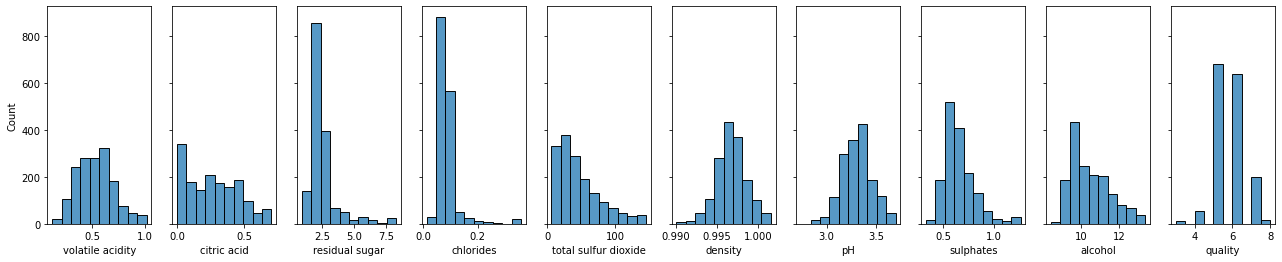

In [208]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, sharey=True, figsize = (22,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1

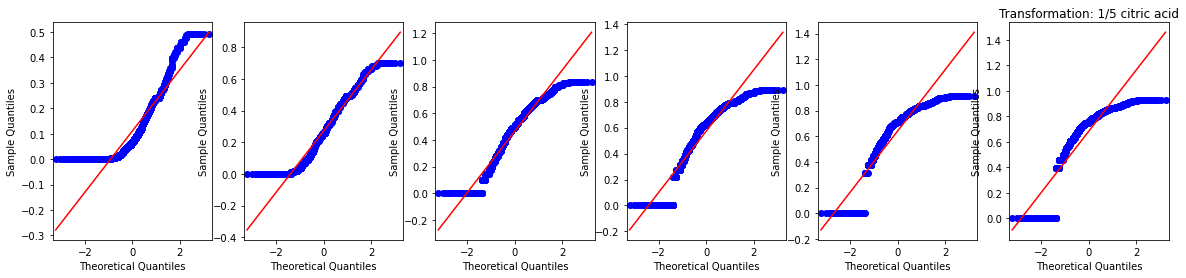

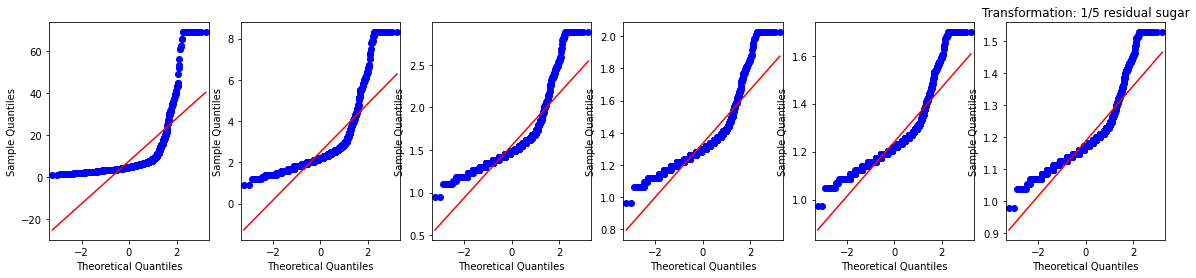

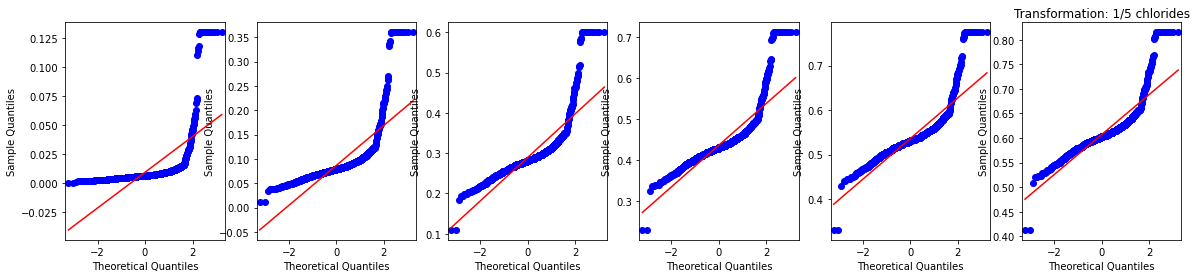

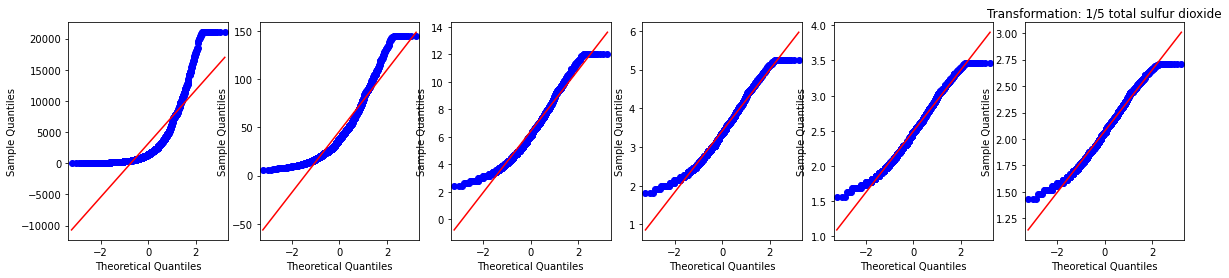

In [145]:
# Generate QQ plots to select best transformation for continuous variables

for column in df[['citric acid','residual sugar', 'chlorides', 'total sulfur dioxide']]:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (20,4), sharey = False)
    number = 1
    for i in [0.5, 1, 2, 3, 4, 5]:
        data = df[column]**(1/i)
        ax_val = 'ax' + str(number)
        qqplot(data, line='s', ax = eval(ax_val))
        plt.title("Transformation: 1/" + str(i) + " " + column.format(str(i)))
        number += 1

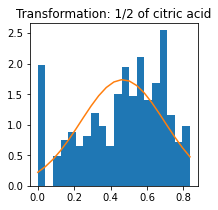

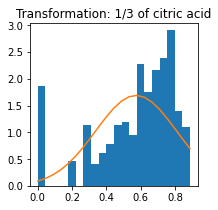

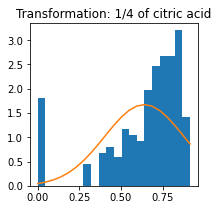

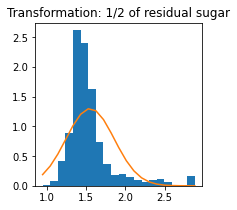

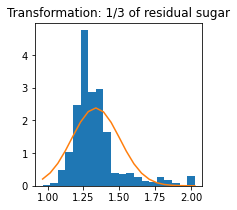

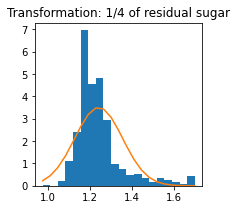

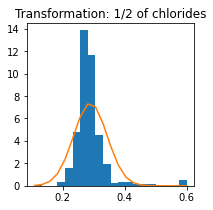

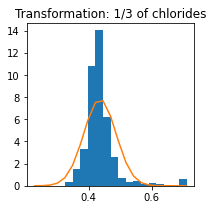

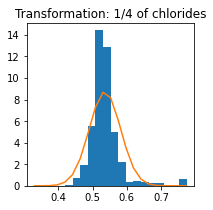

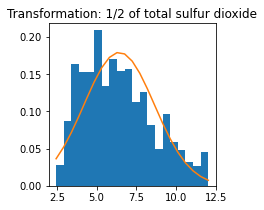

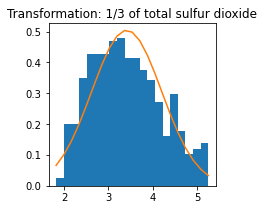

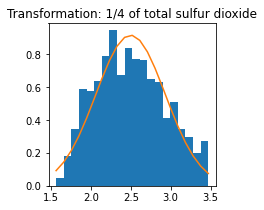

In [146]:
# Box-Cox transformation

for column in df[['citric acid','residual sugar', 'chlorides', 'total sulfur dioxide']]:
    for i in [2, 3, 4]:
        plt.figure(figsize=(3,3))
        data = df[column]**(1/i)
        n, bins, patches = plt.hist(data, 20, density=True)
        mu = np.mean(data)
        sigma = np.std(data)
        plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
        plt.title("Transformation: 1/" + str(i) + " of " + str(column))
        plt.show()

The best transformations for each variables seems to be: 1/3, 1/4 and 1/2 respectively.

In [209]:
# Create the new transformed variable

df['citric acid'] = df['citric acid'].apply(lambda x: x**1/2)
df['residual sugar'] = df['residual sugar'].apply(lambda x: x**(1/4))
df['chlorides'] = df['chlorides'].apply(lambda x: x**(1/4))
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(lambda x: x**(1/4))
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.174055,0.525053,2.414736,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,1.269823,0.559508,2.861006,0.9968,3.20,0.68,9.8,5
2,0.76,0.02,1.231493,0.550740,2.710806,0.9970,3.26,0.65,9.8,5
3,0.28,0.28,1.174055,0.523318,2.783158,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.174055,0.525053,2.414736,0.9978,3.51,0.56,9.4,5


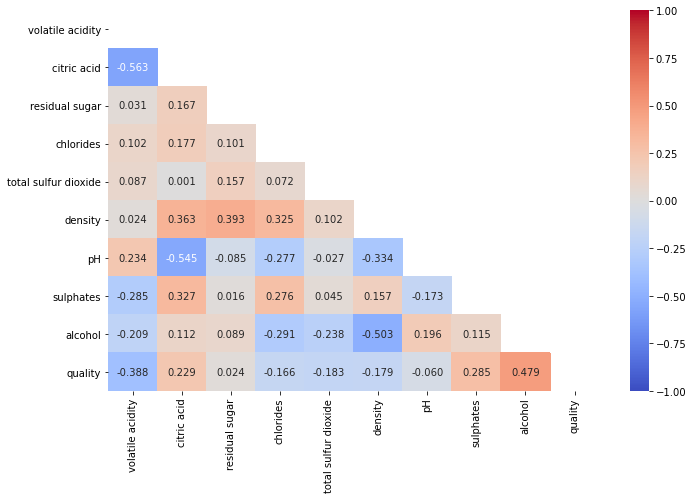

In [210]:
# Generate correlation matrix heat map to eliminate redundant variables
plt.figure(figsize = (11, 7))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

## Create training and test sets

In [211]:
from sklearn.model_selection import train_test_split

labels = df['quality']
df = df.drop(['quality'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
558,0.530,0.245,1.464500,0.586098,2.030543,1.00020,3.07,0.56,11.7
139,0.560,0.095,1.189207,0.533484,3.223710,0.99620,3.32,0.54,9.5
1392,0.620,0.030,1.067790,0.514369,1.861210,0.99420,3.17,0.48,9.8
993,0.340,0.140,1.189207,0.535123,2.871622,0.99694,3.45,0.48,9.4
224,0.635,0.180,1.189207,0.546195,2.723270,0.99745,3.31,0.57,10.4


In [212]:
# Check length of sets
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Standardize variables

In [213]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [214]:
# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
558,0.004950,1.138600,1.898287,1.146408,-1.084284,1.914355,-1.650001,-0.620995,1.203440
139,0.178605,-0.412145,-0.453959,-0.047765,1.677284,-0.299871,0.037500,-0.751047,-0.886344
1392,0.525916,-1.084134,-1.491409,-0.481614,-1.476204,-1.406983,-0.975001,-1.141201,-0.601373
993,-1.094868,0.053079,-0.453959,-0.010565,0.862381,0.109761,0.915001,-1.141201,-0.981334
224,0.612743,0.466611,-0.453959,0.240730,0.519022,0.392075,-0.030000,-0.555969,-0.031432


## Separate sets we want to test

In [215]:
list = []
for column in df:
    list.append(column)
print(list)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [216]:
df_original = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_reduced = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']


In [217]:
X_train_original = X_train[df_original]
X_val_original = X_val[df_original]
X_test_original = X_test[df_original]

X_train_reduced = X_train[df_reduced]
X_val_reduced = X_val[df_reduced]
X_test_reduced = X_test[df_reduced]

## Build Models

Let's explore all datasets and later compare the best performing models

In [218]:
from sklearn.svm import SVC
import inspect
import joblib
from sklearn.model_selection import GridSearchCV

#Check hyperparameters
inspect.signature(SVC)

<Signature (*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)>

In [220]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Original data

In [221]:
svc = SVC()
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X_train_original, y_train.values.ravel())
       
print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.588 (+/-0.082) for {'C': 0.1, 'kernel': 'linear'}
0.598 (+/-0.062) for {'C': 0.1, 'kernel': 'rbf'}
0.61 (+/-0.072) for {'C': 1, 'kernel': 'linear'}
0.632 (+/-0.074) for {'C': 1, 'kernel': 'rbf'}
0.613 (+/-0.078) for {'C': 10, 'kernel': 'linear'}
0.624 (+/-0.059) for {'C': 10, 'kernel': 'rbf'}


In [222]:
cv.best_estimator_

SVC(C=1)

In [223]:
joblib.dump(cv.best_estimator_, '../SVM_model_original.pkl')

['../SVM_model_original.pkl']

### Reduced data

In [224]:
cv.fit(X_train_reduced, y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.579 (+/-0.069) for {'C': 0.1, 'kernel': 'linear'}
0.587 (+/-0.074) for {'C': 0.1, 'kernel': 'rbf'}
0.58 (+/-0.077) for {'C': 1, 'kernel': 'linear'}
0.611 (+/-0.076) for {'C': 1, 'kernel': 'rbf'}
0.579 (+/-0.078) for {'C': 10, 'kernel': 'linear'}
0.613 (+/-0.089) for {'C': 10, 'kernel': 'rbf'}


In [225]:
cv.best_estimator_

SVC(C=10)

In [226]:
joblib.dump(cv.best_estimator_, '../SVM_model_reduced.pkl')

['../SVM_model_reduced.pkl']

The best models with the original set explained a little more variance (63.2%) than the reduced model (61.3%)

## Compare models

In [227]:
from sklearn import metrics
import numpy as np

#### Original model

In [238]:
# Calculate original model to generate accuracy, precision, and recall values
svm = SVC(C= 1, kernel='rbf')
model = svm.fit(X_test_original, y_test)

In [239]:
# perform predictions on the test set
y_pred = model.predict(X_test_original) 
prediction_test = y_pred.tolist()

In [230]:
# Confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
cnf_matrix

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   7,   4,   0,   0],
       [  0,   0, 109,  26,   0,   0],
       [  0,   0,  27,  95,   4,   0],
       [  0,   0,   2,  25,  12,   0],
       [  0,   0,   0,   6,   1,   0]], dtype=int64)

In [231]:
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.81      0.77       135
           6       0.61      0.75      0.67       126
           7       0.71      0.31      0.43        39
           8       0.00      0.00      0.00         7

    accuracy                           0.68       320
   macro avg       0.34      0.31      0.31       320
weighted avg       0.64      0.68      0.64       320



C:\Users\katia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
# perform predictions on the val set
y_pred = model.predict(X_val_original) 
prediction_val = y_pred.tolist()

cnf_matrix = metrics.confusion_matrix(y_val, prediction_val)
cnf_matrix

array([[  0,   9,   3,   0,   0],
       [  0, 104,  39,   0,   0],
       [  0,  45,  75,   2,   0],
       [  0,   3,  32,   7,   0],
       [  0,   0,   1,   0,   0]], dtype=int64)

In [233]:
print(metrics.classification_report(y_val, prediction_test))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.50      0.52      0.51       143
           6       0.46      0.58      0.51       122
           7       0.12      0.05      0.07        42
           8       0.00      0.00      0.00         1

    accuracy                           0.46       320
   macro avg       0.22      0.23      0.22       320
weighted avg       0.41      0.46      0.43       320



C:\Users\katia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Reduced model

In [234]:
# Calculate reduced model to generate accuracy, precision, and recall values
svm = SVC(C= 10, kernel='rbf')
model2 = svm.fit(X_test_reduced, y_test)

# perform predictions on the test set
y_pred = model2.predict(X_test_reduced) 
prediction_test = y_pred.tolist()

cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
cnf_matrix

array([[  1,   0,   1,   0,   0,   0],
       [  0,   1,   7,   3,   0,   0],
       [  0,   0, 114,  18,   3,   0],
       [  0,   0,  40,  80,   6,   0],
       [  0,   0,   2,  14,  23,   0],
       [  0,   0,   0,   2,   2,   3]], dtype=int64)

In [235]:
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       1.00      0.09      0.17        11
           5       0.70      0.84      0.76       135
           6       0.68      0.63      0.66       126
           7       0.68      0.59      0.63        39
           8       1.00      0.43      0.60         7

    accuracy                           0.69       320
   macro avg       0.84      0.51      0.58       320
weighted avg       0.71      0.69      0.68       320



In [236]:
# perform predictions on the val set
y_pred = model2.predict(X_val_reduced) 
prediction_val = y_pred.tolist()

cnf_matrix = metrics.confusion_matrix(y_val, prediction_val)
cnf_matrix

array([[  0,   9,   3,   0,   0],
       [  0, 113,  29,   1,   0],
       [  0,  59,  50,  12,   1],
       [  0,   5,  22,  15,   0],
       [  0,   0,   1,   0,   0]], dtype=int64)

In [237]:
print(metrics.classification_report(y_val, prediction_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        12
           5       0.47      0.54      0.50       143
           6       0.42      0.40      0.41       122
           7       0.12      0.10      0.11        42
           8       0.00      0.00      0.00         1

    accuracy                           0.41       320
   macro avg       0.17      0.17      0.17       320
weighted avg       0.38      0.41      0.39       320



C:\Users\katia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Both models performed poorly with the validation set and fairly with the test set. Because the differences between the models are not robust, we may opt for the reduced model.